In [1]:
# from IPython.display import display, IFrame

# # Replace 'yourfile.pdf' with the path to your PDF file
# file_path = 'theory.pdf'

# # Display the PDF
# display(IFrame(file_path, width=800, height=600))

In [2]:
# import all the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# sns.set()

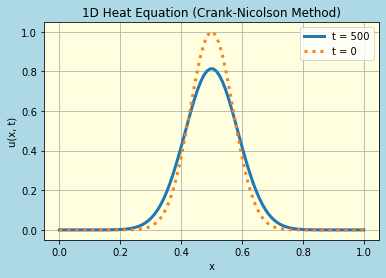

In [3]:
############### define function and solve pde #####################################################
alpha = 1

# x-axis details. It is always better to normalize the data if possible.
xlen = 1
nx = 100
dx = xlen/nx
x = np.linspace(0, xlen, nx)

# ********** time-axis details **********

# maximum value of time-step we can use using stability condition
dtmax = (dx**2)/(4*alpha)

# time-step, used in the algo
dt = .1*dtmax  

# num of time step
nt = 500

# calculate gamma
gma = alpha*(dt/dx**2)

# Initial temperature distribution
u = np.exp(-100 * (x - 0.5)**2)  

# store the initial condition for later comparison
u0 = u

# ********** make two matrix: nx by nx **********

# Way 1: using brut force
A = np.zeros((nx, nx))
B = np.zeros((nx, nx))

for i in range(1, nx-1):
    A[i, i] = 2*(1 + gma)
    A[i, i-1] =  -gma
    A[i, i+1] = - gma
    
    # right hand side
    B[i, i] = 2*(1 - gma)
    B[i, i-1] = gma
    B[i, i+1] = gma
 
# ## Way 2: using py in built
# A = np.zeros((nx, nx))
# B = np.zeros((nx, nx))

# np.fill_diagonal(A, 2*(1+gma))
# np.fill_diagonal(A[1:], -gma)
# np.fill_diagonal(A[1:, 2:], -gma)

# Boundary conditions
A[0, 0] = 1
A[-1, -1] = 1
B[0, 0] = 1
B[-1, -1] = 1

# Time-stepping loop
for n in range(nt):
    # Right-hand side vector
    b = B@u
    
    # Solve the system A u^{n+1} = b
    u = np.linalg.solve(A, b)
    
# Plot the final solution
plt.plot(x, u, label=f"t = {nt}",  linewidth=3)
plt.plot(x, u0, label=f"t = {0}", linestyle='dotted', linewidth=3)

# Change the figure background color
plt.gcf().set_facecolor('lightblue')  # 'gcf()' gets the current figure

# Change the axes background color
plt.gca().set_facecolor('lightyellow')

plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("1D Heat Equation (Crank-Nicolson Method)")
plt.legend()
plt.grid()
plt.show()